# Assessment Examples

This notebook demonstrates functionalities related to the class `AssessmentVisualization`. 

### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ThreeWToolkit.assessment.assessment_visualizations import AssessmentVisualization, ConfigAssessmentVisualization

# Fix seed for experiments
np.random.seed(42)

## plot_confusion_matrix examples:

### Example with pandas Series

Example 1: Pandas Series
class_names=['A', 'B', 'C']


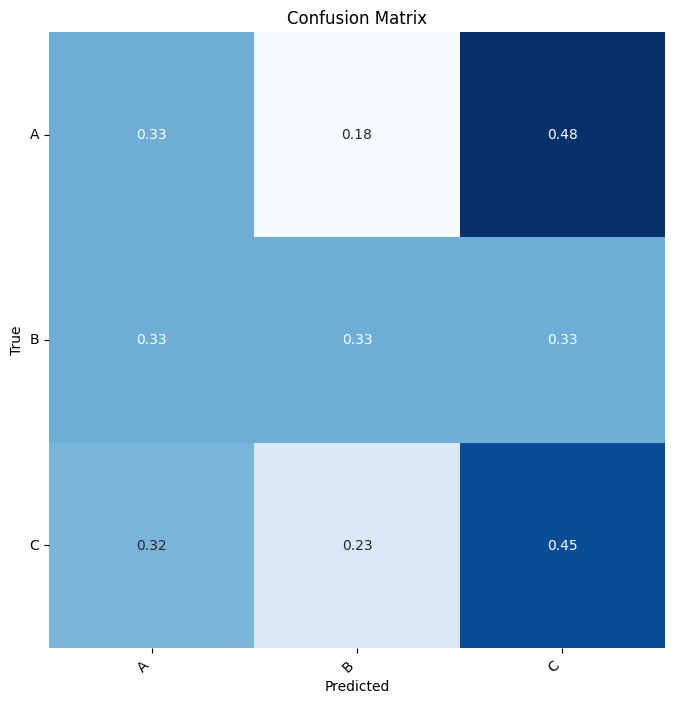

In [2]:
print("Example 1: Pandas Series")

# Create configuration class and plotter instance
config = ConfigAssessmentVisualization(class_names=["A", "B", "C"])
plotter = AssessmentVisualization(config=config)
print(config)

# Generate example data
dates = pd.date_range("2023-01-01", periods=100, freq="h")
y_true_series = pd.Series(np.random.choice([0, 1, 2], size=100), index=dates, name="True State")
y_pred_series = pd.Series(np.random.choice([0, 1, 2], size=100), index=dates, name="Predicted State")

# Plot confusion matrix
confusion_matrix = plotter.plot_confusion_matrix(y_pred=y_pred_series,
                                                 y_true=y_true_series)

### Example with numpy arrays


Example 2: Numpy Arrays


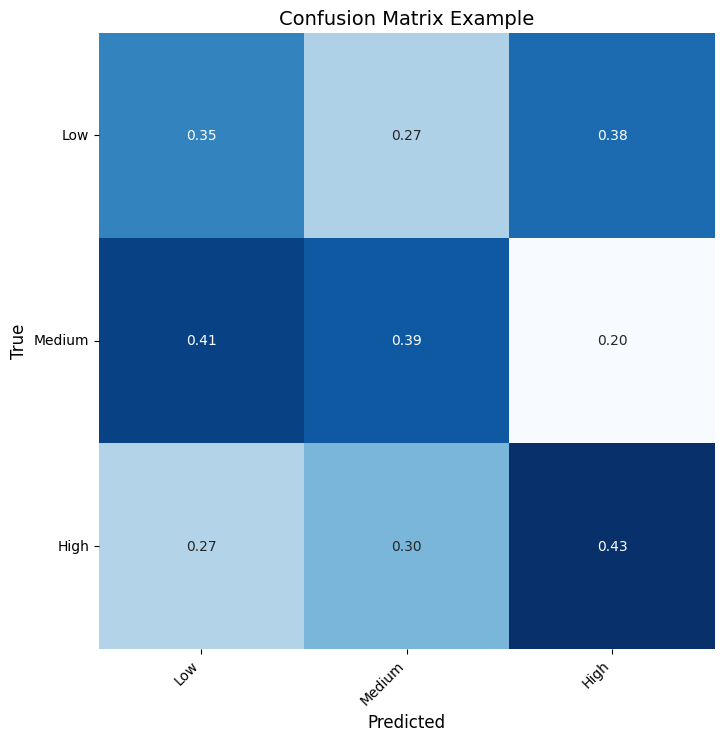

In [ ]:
print("\nExample 2: Numpy Arrays")
y_true_array = np.random.randint(0, 3, size=150)  # 150 samples, 3 classes
y_pred_array = np.random.randint(0, 3, size=150)

config = ConfigAssessmentVisualization(
    class_names=["Low", "Medium", "High"]
)
plotter = AssessmentVisualization(config=config)

confusion_matrix = plotter.plot_confusion_matrix(y_pred=y_pred_array,
                                                    y_true=y_true_array,
                                                    figsize=(10, 8),
                                                    title="Confusion Matrix Example",
                                                    fontsize=12,
                                                    normalize=True)


### Example with Python lists


Example 3: Python Lists


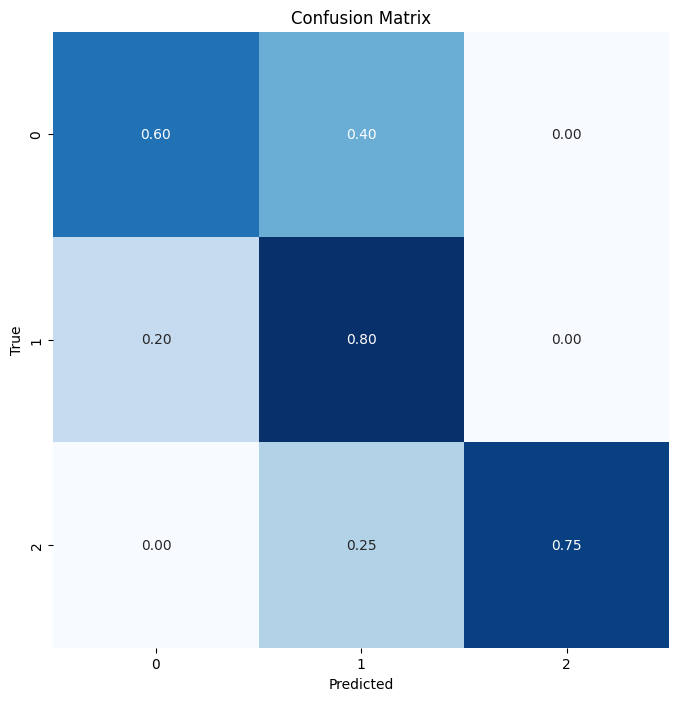

In [ ]:
print("\nExample 3: Python Lists")
y_true_list = [0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2]  
y_pred_list = [0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2]  

# Config without class names
config = ConfigAssessmentVisualization()
plotter = AssessmentVisualization(config=config)


confusion_matrix = plotter.plot_confusion_matrix(y_true=y_true_list, y_pred=y_pred_list)

## feature_visualization examples:

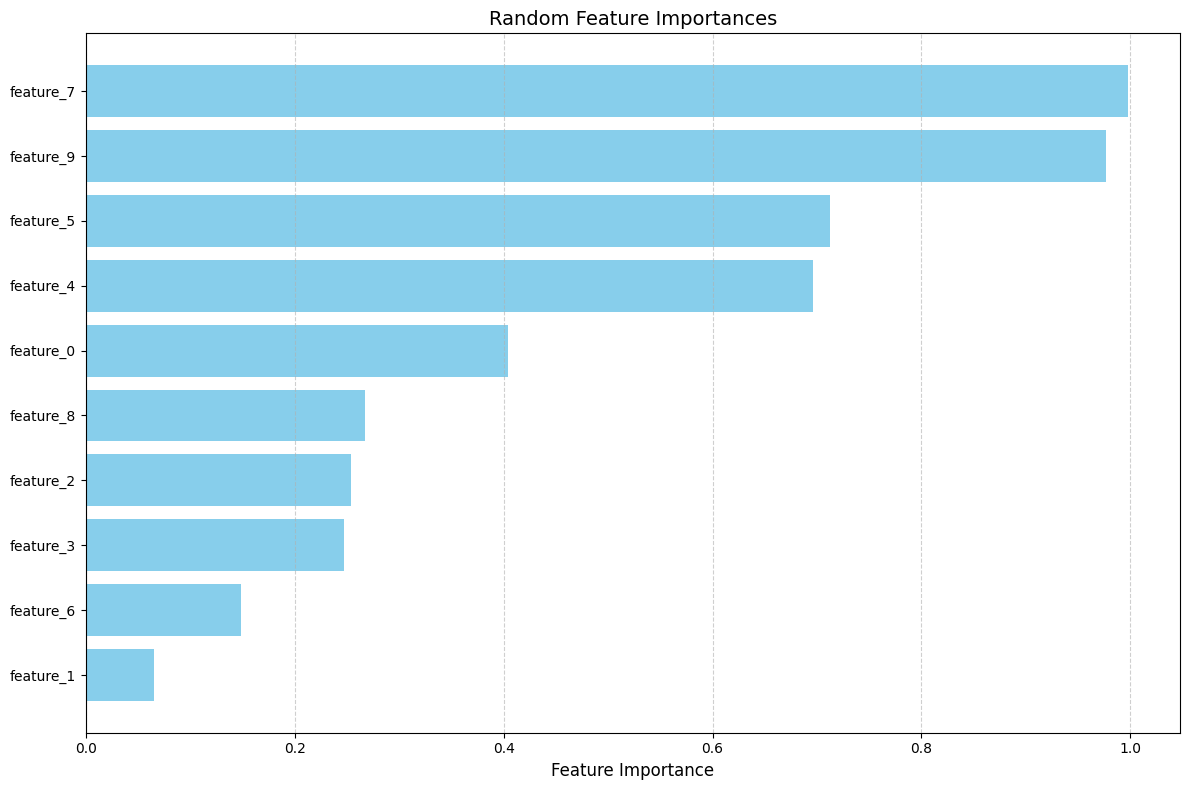

In [3]:
plotter = AssessmentVisualization(config)

# Example 1: Using random feature importances
feature_names = [f"feature_{i}" for i in range(10)]
feature_importances = np.random.rand(10)

config = ConfigAssessmentVisualization()
visualizer = AssessmentVisualization(config)

fig = visualizer.feature_visualization(
    feature_importances=feature_importances,
    feature_names=feature_names,
    title="Random Feature Importances",
)
plt.show()

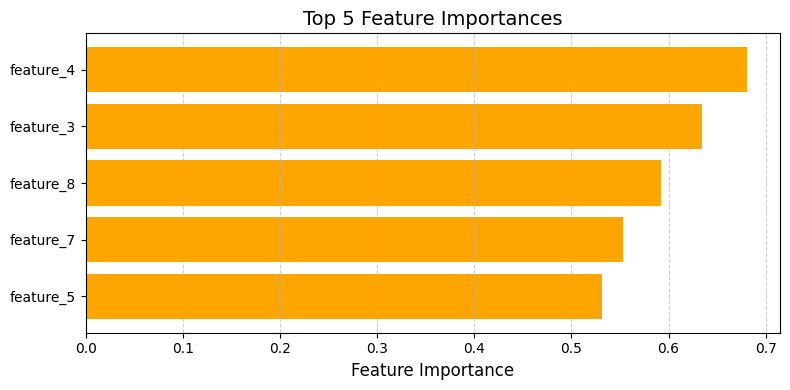

In [4]:
# Example 2: Show only the top 5 features, use a custom color, and a different figure size
feature_names = [f"feature_{i}" for i in range(10)]
feature_importances = np.random.rand(10)

fig = visualizer.feature_visualization(
    feature_importances=feature_importances,
    feature_names=feature_names,
    top_n=5,
    color="orange",
    title="Top 5 Feature Importances",
    figsize=(8, 4),
)
plt.show()

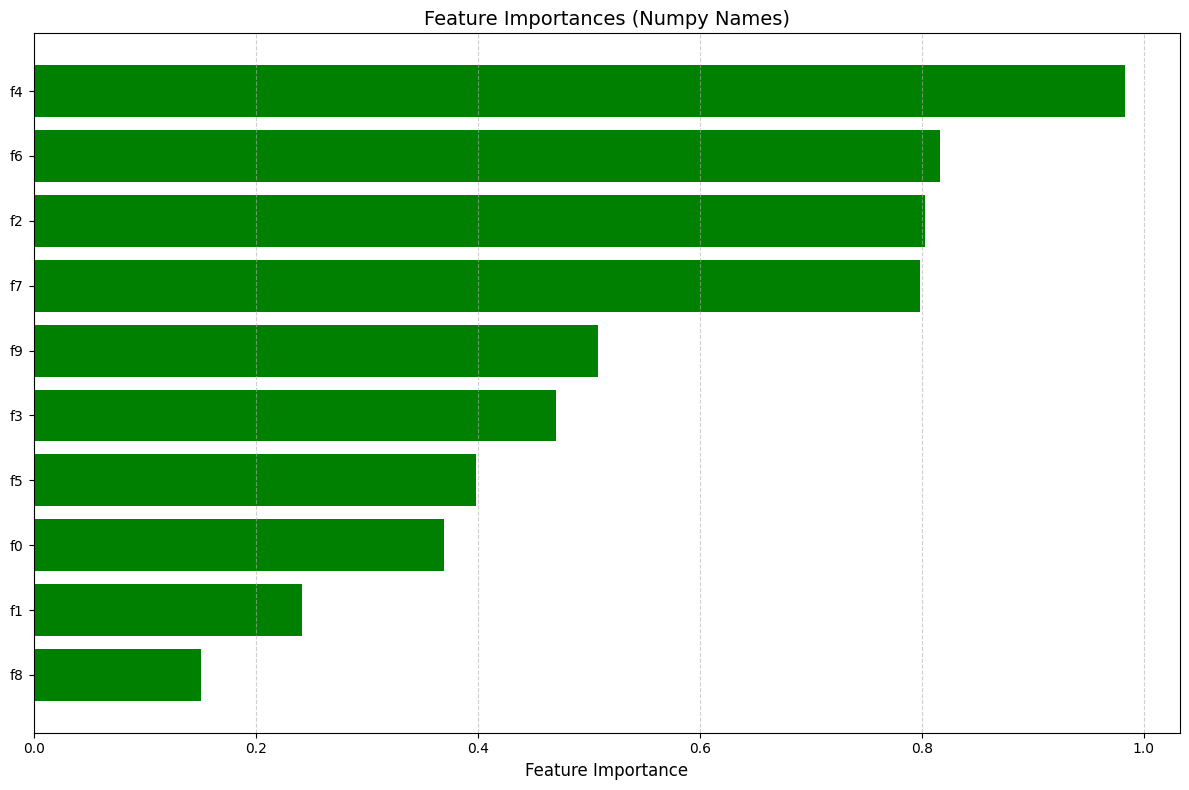

In [5]:
# Example 3: Provide feature names as a numpy array and use a different color
feature_names_np = np.array([f"f{i}" for i in range(10)])
feature_importances = np.random.rand(10)

fig = visualizer.feature_visualization(
    feature_importances=feature_importances,
    feature_names=feature_names_np,
    color="green",
    title="Feature Importances (Numpy Names)",
)
plt.show()


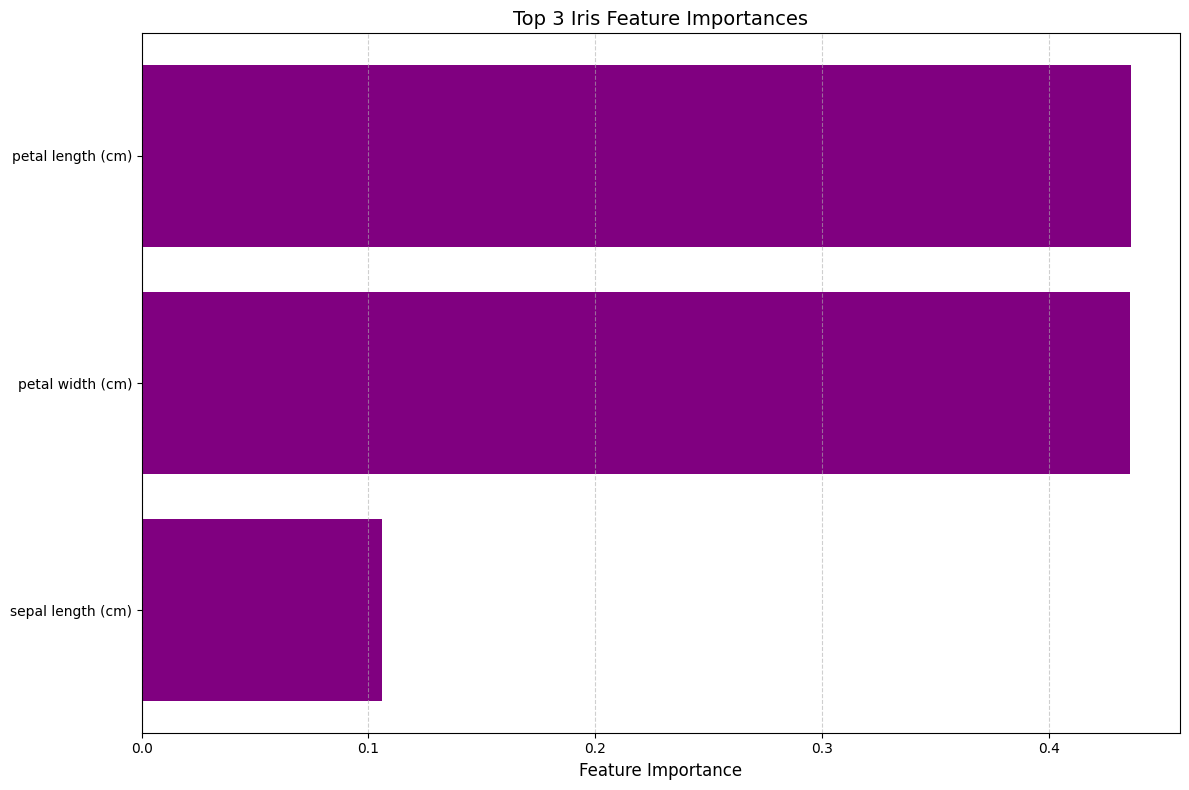

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()  
X, y = iris.data, iris.target
model = RandomForestClassifier(random_state=42).fit(X, y)

fig = visualizer.feature_visualization(
    feature_importances=model.feature_importances_,
    feature_names=iris.feature_names,
    top_n=3,
    color="purple",
    title="Top 3 Iris Feature Importances",
)
plt.show()